# Lecture 9: Introduction to Machine Learning
This lecture introduces the basic concepts of Machine Learning and the basic process involved to build a learning system.\n",

## Basic Terminology

* Output: $Y_i$ or $y_i$ [Dependent Variable or Target]
* Input: $X_i$ or $x_i$ [Independent Variable, Features or Attribute]
* Labelled Data: Data containing both the output and input
* Unsupervised Learning Model: Used when we only have unlabelled data available (i.e. only have data on the input $x_i$)
* Supervised Learning Model: Used when we have labelled data available for at least a subset of the total data (i.e. we have data for both $y_i$ and $x_i$)
* There are two common types of supervised learning models: Regression (where the target value is a numerical value) and classification (where the target value is a category)
* Hyperparameter: Configuration setting to control the behaviour of a learning model.

## Cross-Industry Standard Process for Data Mining (CRISP-DM)
CRISP-DM (Cross-Industry Standard Process for Data Mining) is a widely used methodology for data mining and machine learning projects. It provides a structured approach to planning and executing data mining projects.

![CRISP-DM Framework](crispdm.png)

Source: [Wikipedia](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)

## Estimating a Classifier for the Iris Species
We will begin by trying to determine the correct species of an iris by the dimensions of the sepal and petal.

![Iris](iris2.png)

There are three species of iris within the data:
* Setosa (target = 0)
* Versicolor (target = 1)
* Virginica (targe = 2)

In [3]:
#%% Initialisation
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors, metrics

from IPython.display import display

import warnings
# Suppress the FutureWarning. This is bad practice and should not be used in regular coding.
warnings.simplefilter(action='ignore', category=FutureWarning)

#%% Iris data within sklearn

# Load the iris data set from sklearn's datasets
iris = datasets.load_iris()

# Create a dataframe iris_df to contain feature names and values
# There are 4 features (sepal length and width; petal length and width)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add in the target (y) variable into the iris_df dataframe
# There are 3 Iris species: setosa (target = 0), versicolor (target = 1) and virginica (target = 2)
iris_df['target'] = iris.target

# Create a label for the species for plotting
# Dictionary for mapping
dictionary = {i: str(iris.target_names[i]) for i in range(len(iris.target_names))}

# Applying the mapping
iris_df['species'] = iris_df['target'].map(dictionary)

display(pd.concat([iris_df.head(3),iris_df.tail(3)]))

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0         0     setosa  
1         0     setosa  
2         0     setosa  
147       2  virginica  
148       2  virginica  
149       2  virginica

### Plotting the distribution of petal and sepal sizes by Iris species

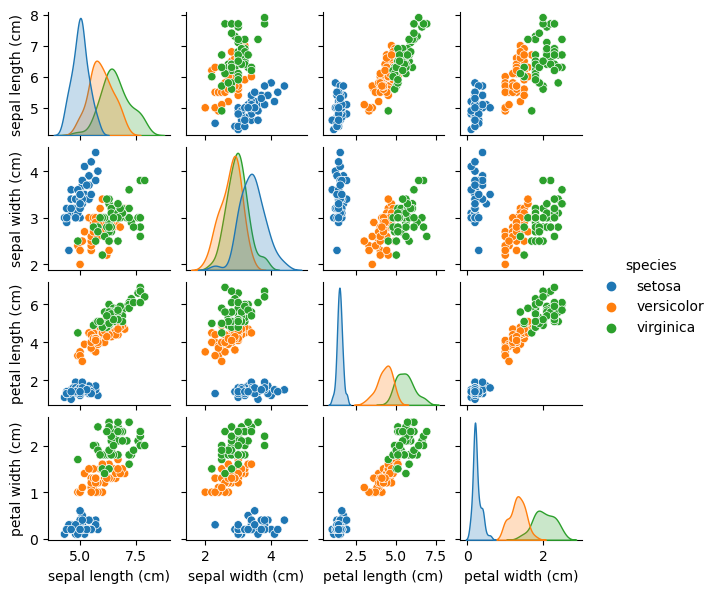

In [4]:
#Produce the pair plots to see the relationship between target and feature values
sns.pairplot(iris_df, hue='species', vars=iris.feature_names, height=1.5)

# The output may produce warnings due to deprecated options set within Seaborn.

* The features of Setosa (blue, target = 0) appears to be distinct from Versicolor and Virginica
* Versicolor and Virginica appear to have overlap, particularly in the case of sepal length and width.

### k-NN Nearest Neighbours Classifier

![3NN Workflow](3nn.png)

* Classify the target based on feature similarity
* We choose a hyperparameter k as the number of nearest neighbours.
   * We set a default of 3 for now, but that can be assessed later if that is the optimal value
* Similarity is defined in terms of feature distances. `sklearn` provides around 20 distance metrics.

![KNN Example](knn.png)

* If k = 3, we will classify the green circle as a red triangle
* If k = 5, we will classify the green circle as a blue square 

In [5]:
#%% Iris k-NN classifier using sklearn

# (Randomly) Split the sample data into training and testing sample
# Set test sample size to 25% or 38 observations since the original sample is 150 observations
# To replicate, we will set the random_state to 44
# We use the original object rather than the Pandas dataframe
(x_train, x_test, y_train, y_test) = train_test_split(iris.data, 
                                                     iris.target, 
                                                     test_size=0.25,
                                                     random_state=44)

print("Train features shape:", x_train.shape)
print("Test features shape:", x_test.shape)

# Estimate and test the 3-NN Model

# Initialise the k-NN object (classifier defaults to n_neighbors = 5, weights = 'uniform')
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# Fit the model using the training sample
fit = knn.fit(x_train, y_train)

# Predict the classifications of the test sample based on the model from the training sample
y_pred = fit.predict(x_test)

# Using sklearn's metrics function, evaluate the out-of-sample predictions
print("3NN accuracy (uniform weights):", round(metrics.accuracy_score(y_test, y_pred),4))

Train features shape: (112, 4)
Test features shape: (38, 4)
3NN accuracy (uniform weights): 0.9737


#### Distance Weights

We may expect that as the distance between two measure samples increases, they are less relavent. We can thus use an inverse weighting metric as a result

In [6]:
# Initialise the 3-NN object with an inverse-distance weights
knn_distance = neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance')

# Fit the model using the training sample
fit_distance = knn_distance.fit(x_train, y_train)

# Predict the classifications of the test sample based on the model from the training sample
y_distance_pred = fit_distance.predict(x_test)

# Using sklearn's metrics function, evaluate the out-of-sample predictions
print("3NN accuracy (inverse distance weights):", round(metrics.accuracy_score(y_test, y_distance_pred),4))

3NN accuracy (inverse distance weights): 0.9737


#### Plotting the classifications based on the change in weights

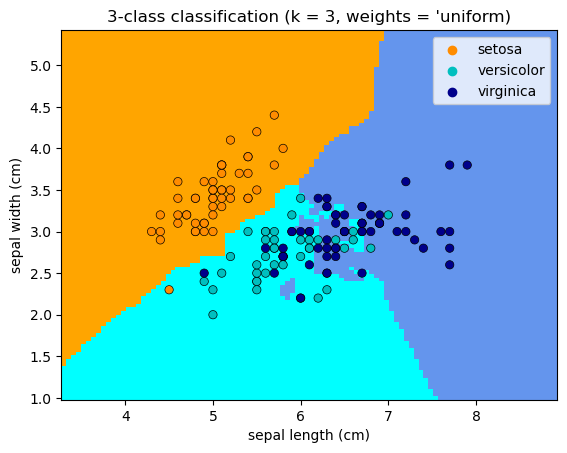

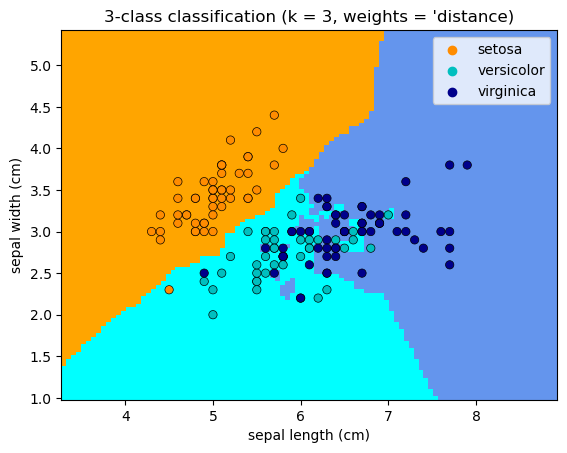

In [7]:
# Create decision boundaries based on the classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# We will simplify the classification to use only two features due to the restrictions on DecisionBoundaryDisplay
(x_train, x_test, y_train, y_test) = train_test_split(iris.data[:,:2], 
                                                     iris.target, 
                                                     test_size=0.25,
                                                     random_state=44)


# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # Create an instance of the Neighbors classifier and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights=weights)
    clf.fit(x_train, y_train)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x_train,
        cmap=cmap_light,
        ax=ax,
        response_method='predict',
        plot_method='pcolormesh',
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading='auto'
    )

    sns.scatterplot(
        x=iris.data[:,0],
        y=iris.data[:,1],
        hue = iris.target_names[iris.target],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor='black'
    )
    plt.title(
        "3-class classification (k = %i, weights = '%s)" % (3, weights)
    )

plt.show()


#### Simple Hyperparameter Tuning

We may want to test our belief that 3-NN is the "best".  We can cycle through alternatives via a loop:

In [8]:
#%% Iris k-NN classifier using sklearn over serveral values of nearest neighbours

# (Randomly) Split the sample data into training and testing sample
(x_train, x_test, y_train, y_test) = train_test_split(iris.data, 
                                                     iris.target, 
                                                     test_size=0.25,
                                                     random_state=44)


# Estimate the predictive accuracy for various nearest neighbour models between 1 and 15 in steps of 2
for k in range(1,17,2):
    # Initialise the k-NN object (classifier defaults to n_neighbors = 5, weights = 'uniform')
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model using the training sample
    fit = knn.fit(x_train, y_train)

    # Predict the classifications of the test sample based on the model from the training sample
    y_pred = fit.predict(x_test)

    print(f"{k}-NN accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")


1-NN accuracy: 0.9737
3-NN accuracy: 0.9737
5-NN accuracy: 0.9737
7-NN accuracy: 0.9737
9-NN accuracy: 0.9737
11-NN accuracy: 0.9737
13-NN accuracy: 0.9737
15-NN accuracy: 0.9737


As we can see, there was nothing to be gained in terms of changing the nearest neighbour hyperparameter in this example. This is not always the case.

### Naive Bayes Classifier

Bayes' Theorem provides a way to update the probability that an observation/unit in a class given new evidence or features

$P(C | X) = \frac{P(X | C) \cdot P(C)}{P(X)}$

Where:
- $C$ is the class and $X$ is the set of features
- $P(C|X)$ is the posterior probability: the probability of the hypothesis $C$ being true given the evidence $X$.
- $P(C)$ is the prior probability: the initial probability of the hypothesis $C$ before seeing the evidence.
- $P(X|C)$ is the likelihood: the probability of observing the evidence $X$ given that the hypothesis $C$ is true.
- $P(X)$ is the marginal likelihood: the total probability of observing the evidence $C$ under all possible hypotheses.

In simple terms, we start with an initial guess on what the likelihood an observation falls within a given class. We then use the evidence of certain features being associated with a given class to update our probability.

In [9]:
#%% Import Naive Bayes Classifier
from sklearn import naive_bayes

# Fit the model using the training sample while also initialising the bayes classifier object
fit = naive_bayes.GaussianNB().fit(x_train, y_train)

# Predict the classification on the same test sample as used in the knn in order to properly assess the relative fit
y_pred = fit.predict(x_test)

print(f"Naive Bayes accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")

Naive Bayes accuracy: 0.9211


## Predicting Severity of Diabetes with Regression

When the outcome or target data is continuous, we use regression analysis rather than a classifier.

Using a numerical score from doctors that indicate the progression of a patient's illness, we will see whether we can predict the severity based on a several characteristics (features) from the patients.

[Data Documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [10]:
#%% Diabetes Data in sklearn
diabetes = datasets.load_diabetes()

# Prepare the data of interest into a dataframe
# bmi is the body mass index
# bp is the blood pressure
# s1-s6 are six blood serum measurements
# target is a numerical score measuring the progression of the illness one year after the baseline measurement

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target']= diabetes.target
diabetes_df.head(10)

# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples 
# (i.e. the sum of squares of each column totals 1).

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
5 -0.076395 -0.041176 -0.096346    97.0  
6 -0.039493 -0.062917 -0.038357   138.0  
7  0.017703 -0.035816  0.003064    63.0  
8 -0.002592 -0.014960  0.011349   110.0  
9 -0.002592  0.067737 -0.013504   310.0

### Pairplot of Potential Key Features by Sex

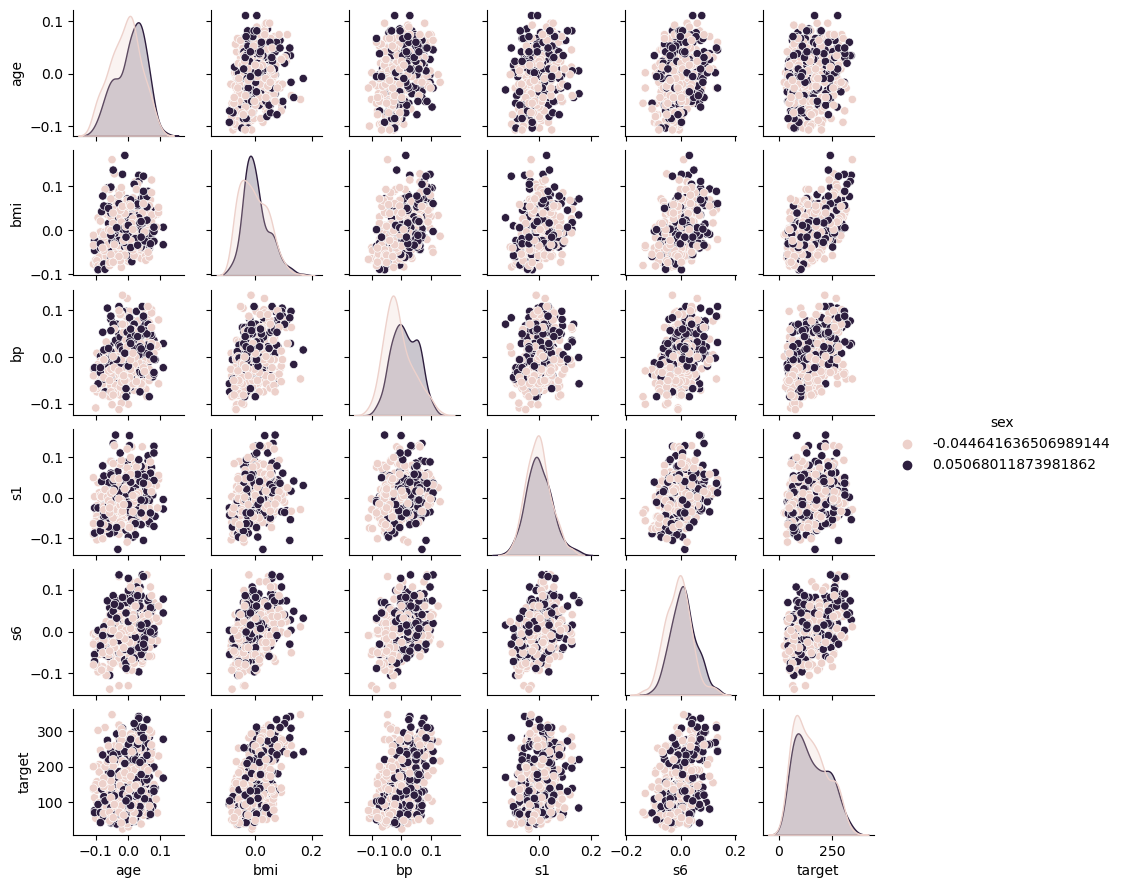

In [11]:
#Produce the pair plots to see the relationship between target and feature values
sns.pairplot(diabetes_df, hue='sex', vars=['age', 'bmi', 'bp', 's1', 's6','target'], height=1.5)

### Predicting the Diabetes Data using 3NN

3NN MSE: 3992.26
3NN Prediction Error relative the range: 0.20


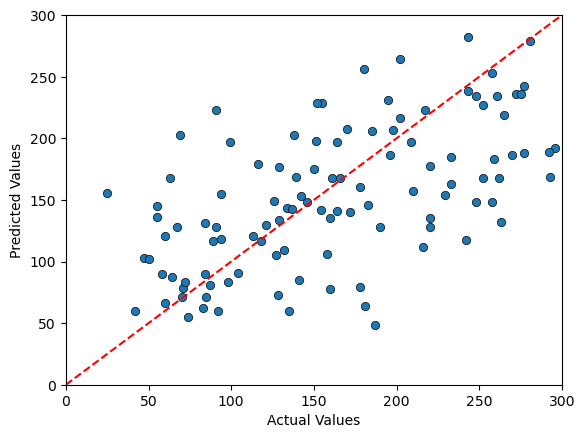

In [12]:
# Import numpy
import numpy as np

# Split the sample into 75% Training and 25% Test
(x_train, x_test, y_train, y_test) = train_test_split(diabetes.data, 
                                                      diabetes.target, 
                                                      test_size=0.25, 
                                                      random_state = 44)

# Initialise the 3-NN Regressor Model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

# Fit the Model to the Data
fit = knn.fit(x_train, y_train)

# Produce Out of Sample Predictions for the target variable 
# with the 25% test sample
y_pred = fit.predict(x_test)

# Evaluate the out-of-sample predictions using mean-squared errors
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f"3NN MSE: {MSE:.2f}")

# Compare the predictions relative the range of the data
relativeMSE = np.sqrt(MSE) / (diabetes.target.max() - diabetes.target.min())
print(f"3NN Prediction Error relative the range: {relativeMSE:.2f}")

# Compare the predicted values relative to the actual values
# Plot a line
x_vals = np.linspace(0,300,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, '--', color ='red')

sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=1.0,
    edgecolor='black'
)
plt.xlim(0,300)
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

### Predicting the Diabetes Data using Linear Regression

3NN MSE: 2815.24
3NN Prediction Error relative the range: 0.17


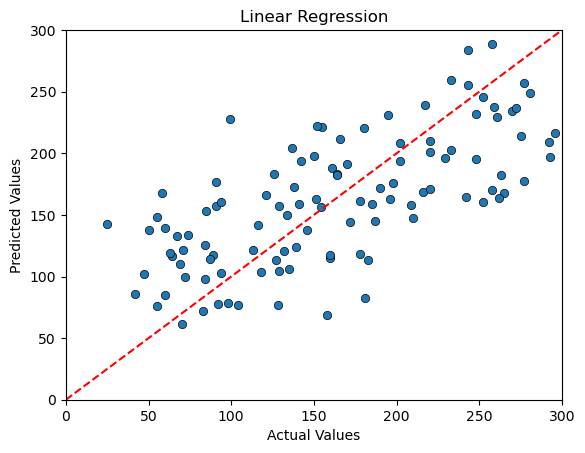

In [13]:
#%% Linear Regressor
from sklearn import linear_model

# Initialise the 3-NN Regressor Model
lr = linear_model.LinearRegression()

# Fit the Model to the Data
fit = lr.fit(x_train, y_train)

# Produce Out of Sample Predictions for the target variable 
# with the 25% test sample
y_pred = fit.predict(x_test)

# Evaluate the out-of-sample predictions using mean-squared errors
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f"3NN MSE: {MSE:.2f}")

# Compare the predictions relative the range of the data
relativeMSE = np.sqrt(MSE) / (diabetes.target.max() - diabetes.target.min())
print(f"3NN Prediction Error relative the range: {relativeMSE:.2f}")

# Compare the predicted values relative to the actual values
# Plot a line
x_vals = np.linspace(0,300,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, '--', color ='red')

sns.scatterplot(
    x=y_test,
    y=y_pred,
    alpha=1.0,
    edgecolor='black'
)
plt.xlim(0,300)
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('Linear Regression')

plt.show()

We can see an interesting pattern in the data that is a bit more visible with Linear Regression than in the 3NN. While Linear Regression yields less erroneous predictions on average, we do see evidence that we are overpredicting Diabetes progression in cases where the progression has been the mildest and underpredicting in cases with the most severe progression.

## k-Fold Cross-Validation (CV)

* Different Training-Test sample splits from the same data may yield different predictions and hence differences in accuracy (or MSE)
* Given that we only have one dataset, how can we test the sensitivity of the split?
* Cross-Validation is a tool that splits the data into multiple (k) buckets that can be rotated in use to determine how stable the predictions.

![Cross Validation](cv_1.png)

* We can average k-fold CV to compare different models
* For regressions, we often choose the scoring methods to be the negative mean squared errors so we can select the model with the largest value (ie. smallest errors)
* If the k-fold CV scores vary significantly, then the model is sensitive to the test-train sample split.


In [14]:
from sklearn import model_selection

#%% 5-fold CV for 10-NN Regression Model with Diabetes Data
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

# Defaults are cv = 3, no shuffle, stratified if classifier, 
# score is R2 if regressor, accuracy if classifier
scores_diabetes = model_selection.cross_val_score(knn,
                                                  diabetes.data,
                                                  diabetes.target,
                                                  cv=5,
                                                  scoring='neg_mean_squared_error')

formatted_scores = [f"{score:.2f}" for score in scores_diabetes]
print(f"Range of Scores: {', '.join(formatted_scores)}")
print(f"Average: {scores_diabetes.mean():.2f}")


Range of Scores: -3206.75, -3426.43, -3587.94, -3039.49, -3282.60
Average: -3308.64


### Graphically Assess Accuracy with SKLearn's Learning Curve

Purpose of Learning Curve:
* To generate learning curves, which show how training and validation scores evolve with varying amounts of training data.
* Useful for diagnosing whether a model is suffering from high bias (underfitting) or high variance (overfitting).

0      1      2      3      4  Mean 5-CV
% Used in Training                                              
10                  0.333  0.333  0.333  0.333  0.333      0.333
20                  0.333  0.333  0.333  0.333  0.333      0.333
30                  0.333  0.333  0.333  0.333  0.333      0.333
40                  0.667  0.667  0.667  0.667  0.667      0.667
50                  0.667  0.667  0.667  0.667  0.667      0.667
60                  0.667  0.667  0.667  0.667  0.667      0.667
70                  0.933  0.800  0.833  0.867  0.800      0.847
80                  0.967  0.933  0.900  0.900  0.967      0.933
90                  0.967  1.000  0.900  0.967  1.000      0.967
100                 0.967  1.000  0.933  0.967  1.000      0.973

Text(0.5, 1.0, 'Test Performance, 5-Fold CV 5NN Classifier for Iris')

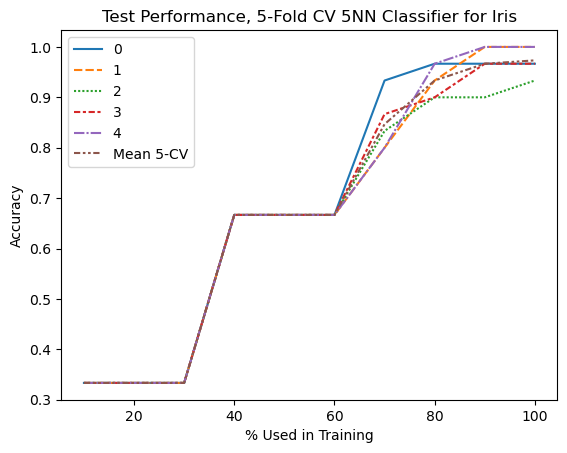

In [15]:
#%%  Graphically Assess Test-Train Sample Split using SKLearn's Learning_Curve()

# Create 10 sets of training data based on sizes ranging from 10% to 100%
train_sizes = np.linspace(.1, 1.0, 10)

# Initalise the 5-nn classifier
# Ensure that this is not too close the size of the training sample
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Call the sklearn's learning_curve function
(train_N, train_scores, test_scores) = model_selection.learning_curve(estimator= knn, 
                                                                      X=iris.data, 
                                                                      y=iris.target,
                                                                      cv=5, train_sizes=train_sizes,
                                                                      scoring='accuracy')

# Collapse Across the 5 CV Scores
CVScores_df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(int))
CVScores_df['Mean 5-CV'] = CVScores_df.mean(axis='columns')
CVScores_df.index.name = "% Used in Training"

# Display the results
display(CVScores_df.round(3))

g1 = sns.lineplot(data=CVScores_df)
g1.set_ylabel('Accuracy')
g1.set_title('Test Performance, 5-Fold CV 5NN Classifier for Iris')

### Does Complex = Accuracy?

Purpose of Validation Curve:
* To assess how the performance of a model changes as a specific hyperparameter is varied.
* Helps in identifying the best value for a hyperparameter and understanding whether a model is underfitting or overfitting.

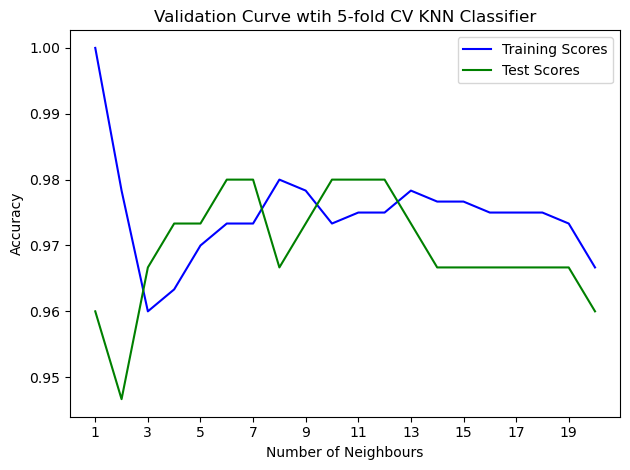

In [16]:
#%% Comparing Accuracy over more complex models using validation curve

# Consider range of values for k from 1 to 20
num_neigh = list(range(1,21))

# Initalise the 5-nn classifier
knn = neighbors.KNeighborsClassifier()

# Call the validation curve function
(train_scores, test_scores) = model_selection.validation_curve(estimator= knn, 
                                                                      X=iris.data, 
                                                                      y=iris.target,
                                                                      cv=5,
                                                                      param_name='n_neighbors',
                                                                      param_range=num_neigh,
                                                                      scoring='accuracy')

# Calculating the mean and standard deviation of the training scores
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis = 1)

# Calculating the mean and standard deviation of the test scores
mean_test_scores = np.mean(test_scores, axis=1)
std_test_scores = np.std(test_scores, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(num_neigh, mean_train_scores,
         label="Training Scores", color='b')
plt.plot(num_neigh, mean_test_scores,
         label="Test Scores", color='g')

# Creating the plot
plt.title("Validation Curve wtih 5-fold CV KNN Classifier")
plt.xticks(list(range(1,20,2)))
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### Comparing Naive Bayes Classifier to KNN Classifier using CV 

We can use the mean accuracy across the cross-validation samples to better assess what classifier has higher accuracy rather than relying on a single sample as demonstrated above.


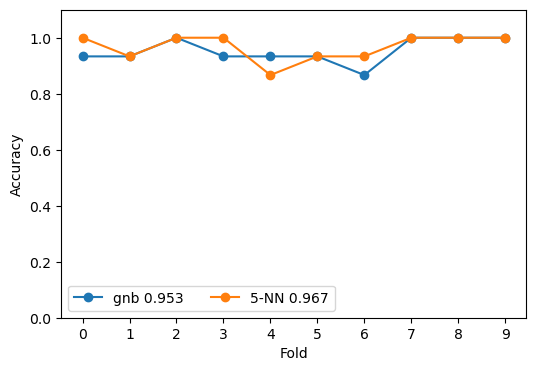

In [17]:
#%% Comparing Naive Bayes to KNN using CV

classifiers = {'gnb': naive_bayes.GaussianNB(),
               '5-NN': neighbors.KNeighborsClassifier(n_neighbors=5)}

# Initialise the figure for two subplots
fig, ax = plt.subplots(figsize=(6, 4))

# Fit the Models and Comput CV Scores
for name, model in classifiers.items():
    cv_scores = model_selection.cross_val_score(model, 
                                                iris.data,
                                                iris.target,
                                                cv = 10,
                                                scoring = 'accuracy',
                                                n_jobs=-1)
    
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, '-o', label=my_lbl)

ax.set_ylim(0.0, 1.1)
plt.xticks(list(range(0,10,1)))
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(ncol=2)

## Introduction to Confusion Matrices

A **confusion matrix** is a table used to evaluate the performance of a classification model, especially in binary classification tasks. It provides a detailed breakdown of the model's predictions, comparing the actual labels with the predicted labels.

### Components of a Confusion Matrix

A confusion matrix consists of four key elements:

- **True Positives (TP):** The number of instances correctly predicted as the positive class.
- **True Negatives (TN):** The number of instances correctly predicted as the negative class.
- **False Positives (FP):** The number of instances incorrectly predicted as the positive class (Type I error).
- **False Negatives (FN):** The number of instances incorrectly predicted as the negative class (Type II error).

### Example Layout

![Confusion Matrix](confusionmatrix.png)

### Why Use a Confusion Matrix?

Confusion matrices provide a more detailed assessment of a model's performance than simple accuracy. They allow you to calculate important metrics such as:

- **Accuracy:** The proportion of correct predictions
- **Precision:** The proportion of positive predictions that are actually correct.
- **Recall (Sensitivity):** The proportion of actual positives that are correctly identified.
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure.

confusion matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]


Text(20.72222222222222, 0.5, 'Actual')

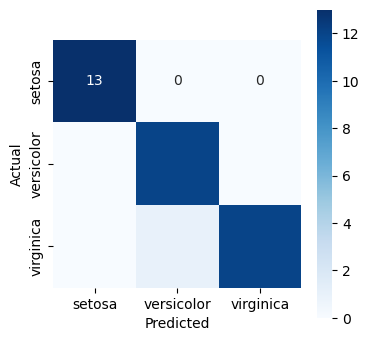

In [18]:
#%% Computing the Confusion Matrix as a Heatmap

(x_train, x_test, y_train, y_test) = train_test_split(iris.data,
                                                      iris.target,
                                                      test_size=.25,
                                                      random_state=44)

y_pred = neighbors.KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train).predict(x_test)

# Compute a simple matrix that can be printed
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris.target_names,
                 yticklabels=iris.target_names,
                 fmt='d',
                 cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## Advanced Classifiers

### Predicting Corporate Bankruptcy

You may recall from earlier that we had a dataset on US corporate bankruptcies, `USCorporateDefault.csv`. This data contains information in the following eight columns:

1. Firm ID: ID number of the firm
2. Year: Year of default.
3. Default: Default status
4. WC/TA: Working Capital (WC) divided by Total Assets (TA)
5. RE/TA: Retained Earnings (RE) divided by Total Assets (TA)
6. EBIT/TA: Earnings before interest and tax (EBIT) divided by Total Assets (TA)
7. ME/TL: Market Value of Equity (ME) divided by Total Liabilities (TL)
8. S/TA: Sales (S) divided by Total Assets (TA)

The above five ratios are based on Altman (1968)’s Z-scores that could potentially predict the probability of default:
- WC/TA captures the short-term liquidity of a firm.
- RE/TA and EBIT/TA measure historic and current profitability.
- S/TA is a proxy measure for the compe��veness of the firm.
- ME/TL is a market-based measure of firm’s leverage.

**Let's first compare relationships between the features and target data**

Firm ID
Year
Default
WC/TA
RE/TA
EBIT/TA
ME/TL
S/TA


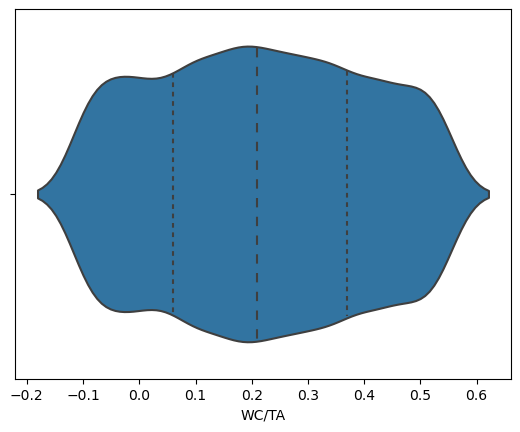

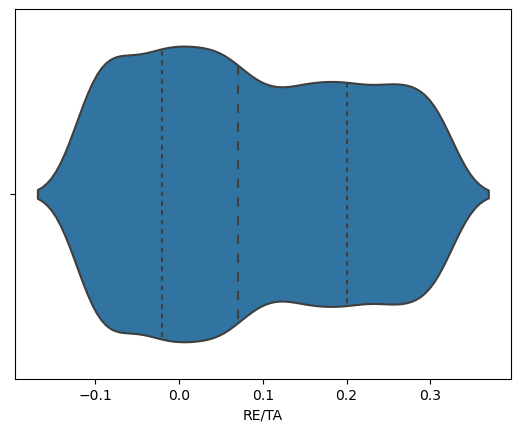

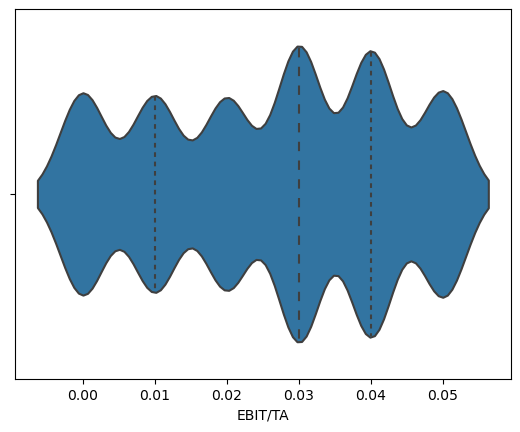

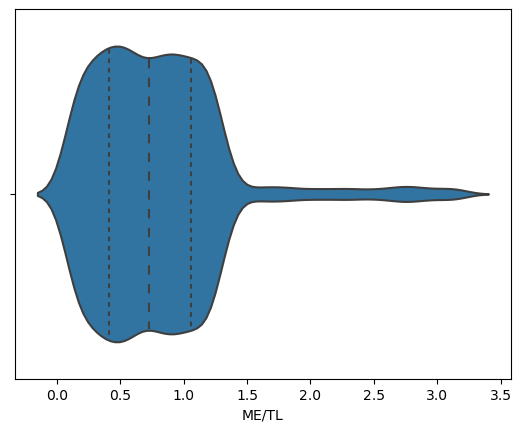

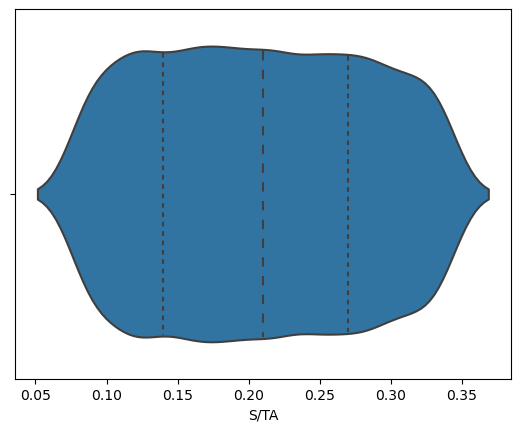

In [19]:
#%% 10-NN Classifier Model for Corporate Default

# load the corporate default data
corp_df = pd.read_csv("USCorporateDefault.csv")

# Print the column names
for column in corp_df.columns:
    print(column)

for variable in ['WC/TA', 'RE/TA','EBIT/TA', 'ME/TL', 'S/TA']:
    sns.violinplot(corp_df, hue='Default', x=variable, split=True, inner="quart")
    plt.show()

We see that across these five features, the distribution of values suggest that we can potentially isolate some values as more likely to predict bankruptcies than others.

### Exploring corporate bankruptcies using the KNN Classifier

Recall: 0.6182
Accuracy: 0.9530
confusion matrix:
[[885   5]
 [ 42  68]]


Text(20.72222222222222, 0.5, 'Actual Dafault')

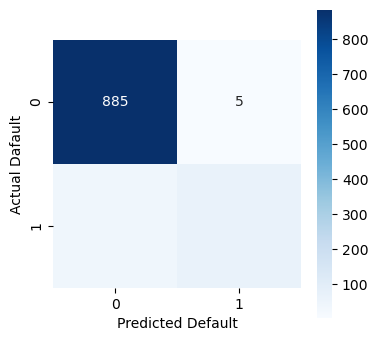

In [20]:
# split the sample (75:25) and set random_state so the results are reproducible
# Notice how we supply the DataFrame columns for the feature (x) and target (y)
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(corp_df[['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']],
                                                                      corp_df[['Default']],
                                                                      test_size=.25,
                                                                      random_state=42)
# initialise 10-NN Classifier model
knn = neighbors.KNeighborsClassifier(n_neighbors=10)

# fit the model. Ravel converts to a one-dimensional array
fit = knn.fit(x_train, y_train.values.ravel())

# make the prediction of corporate default
y_pred = fit.predict(x_test)

print(f"Recall: {metrics.recall_score(y_test, y_pred):.4f}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")

# compute and print the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:", cm, sep="\n")

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.heatmap(cm,
                 fmt=".0f", # Avoid printing in scientific notation
                 annot=True, 
                 square=True,
                 cmap='Blues')
ax.set_xlabel('Predicted Default')
ax.set_ylabel('Actual Dafault')

While the model is fairly accurate at 95%, we see that the KNN classifier struggles to predict actual bankruptcies. If we were basing an investment decision on this classifier, we would likely have too much exposure to risk!

### ROC Curve Explained

![ROC Curve](roccurve.png)

**ROC (Receiver Operating Characteristic) Curve** is a graphical representation used to assess the performance of a binary classification model. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.

- **True Positive Rate (TPR)**: Also known as sensitivity or recall, it is the proportion of actual positives correctly identified by the model.

  $\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$

- **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly classified as positives by the model.  
  
  $\text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}$

### Interpreting the ROC Curve

- The **x-axis** represents the FPR.
- The **y-axis** represents the TPR.
- A model with no discrimination ability (random guessing) will produce a diagonal line from (0,0) to (1,1).
- The **closer the ROC curve is to the top-left corner**, the better the model is at distinguishing between the positive and negative classes.

### AUC (Area Under the Curve)

- **AUC** is a single scalar value summarizing the overall performance of the model.
- **AUC = 1**: Perfect model.
- **AUC = 0.5**: Model with no discrimination (equivalent to random guessing).
- **AUC < 0.5**: Model performs worse than random guessing.

A higher AUC indicates better overall performance of the model.

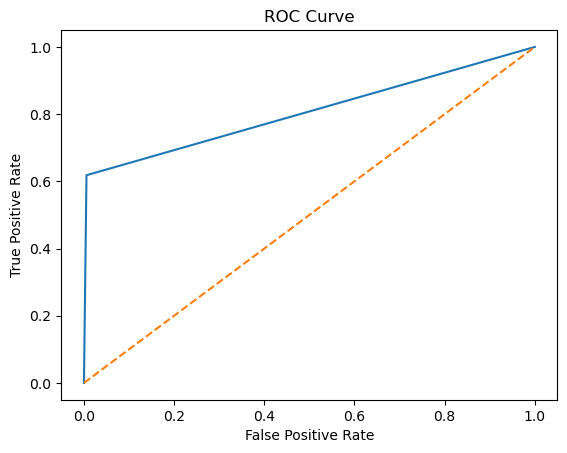

In [21]:
# %% ROC Curve for Corporate Default Model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Comparing Five Models of Corporate Default

Let's see if the other models we have previously explored may yield better results both in terms of accuracy, as well as recall.

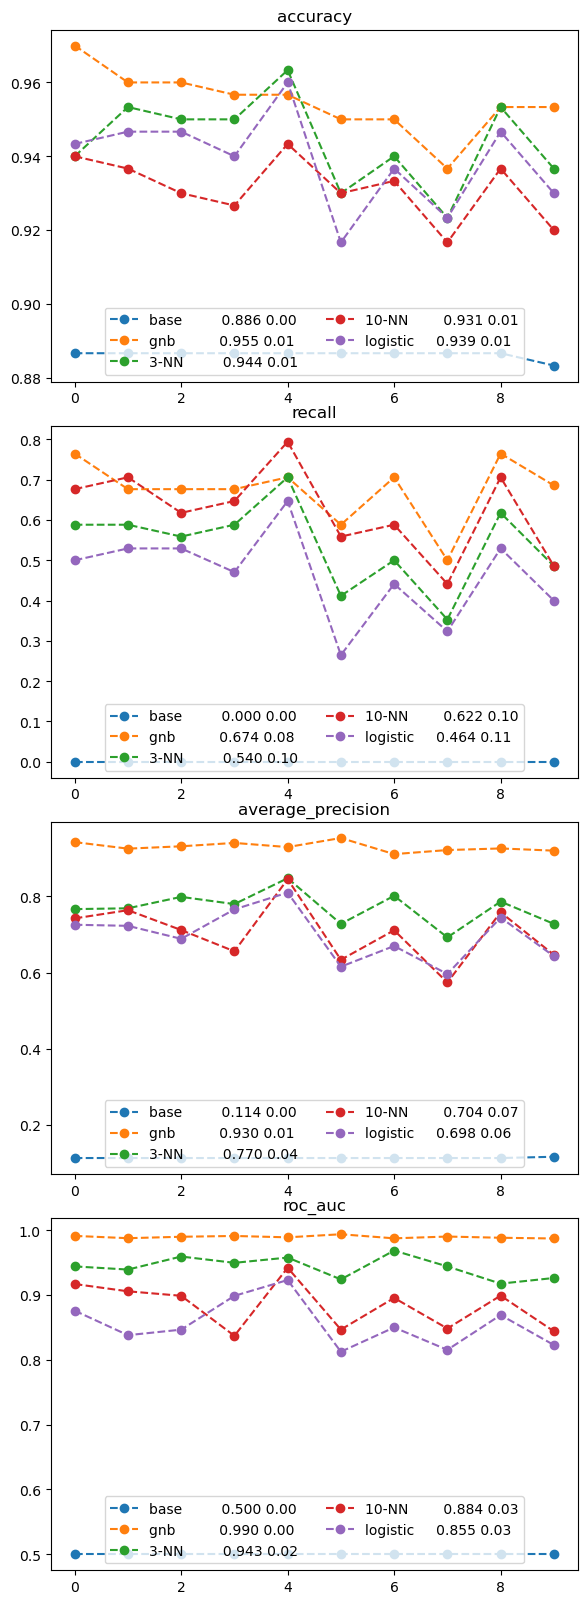

In [22]:
from sklearn import dummy

# %% Comparing Classifiers models of corporate default

#These are the 5 Classifiers we want to compare

# The dummy classifier is set that we always predict the class that is most frequent, in this case,
# no bankruptcy.
baseline = dummy.DummyClassifier(strategy="most_frequent")

classifiers = {'base': baseline,
               'gnb': naive_bayes.GaussianNB(),
               '3-NN': neighbors.KNeighborsClassifier(n_neighbors=10),
               '10-NN': neighbors.KNeighborsClassifier(n_neighbors=3),
               'logistic': linear_model.LogisticRegression()
}

# consider four different prediction performance measures
msrs = ['accuracy', 'recall', 'average_precision', 'roc_auc']

#Prepare figure to containe 3 subplots: one for each prediction measures
fig, axes = plt.subplots(len(msrs), 1, figsize=(6, 4*len(msrs)))
fig.tight_layout()
#fit the Cross-Validation models for each specified classifier
for mod_name, model in classifiers.items():
    # Invoke Cross-Validation in sklearn for each model
    cvs = model_selection.cross_val_score
    cv_results = {msr: cvs(model, x_train, y_train.values.ravel(),
    scoring=msr, cv=10) for msr in msrs}
    
    # Now plot the performance measures using average of the cross validation
    # Note: The zip() function returns a zip object,which is an iterator of
    # tuples where the first item in each passed iterator is paired together,
    # and then the second item in each passed iterator are paired together etc.
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results[msr]
        my_lbl = "{:12s} {:.3f} {:.2f}".format(mod_name,
        msr_results.mean(),
        msr_results.std())
        ax.plot(msr_results, 'o--', label=my_lbl)
        ax.set_title(msr)
        ax.legend(loc='lower center', ncol=2)

### Decision Tree Classifier Explained

A **Decision Tree Classifier** is a type of supervised learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the most significant attribute that maximizes the distinction between different classes.

#### How it Works

1. **Root Node**: The algorithm starts at the root node, which contains the entire dataset.

2. **Splitting**: The data is split into subsets based on an attribute that best separates the classes. This decision is made using metrics like **Gini Impurity** or **Information Gain (Entropy)**:
   - **Gini Impurity**: Measures the probability of a randomly chosen element being misclassified if it was randomly labeled according to the distribution of labels in the subset.
   
   $\text{Gini}(D) = 1 - \sum_{i=1}^{n} p_i^2$
   - **Information Gain**: Measures the reduction in entropy when a dataset is split on an attribute.
   
   $\text{Information Gain} = \text{Entropy before} - \text{Entropy after}$

3. **Nodes and Branches**: After the first split, the process is recursively applied to each subset, creating nodes (decision points) and branches (possible outcomes).

4. **Leaf Nodes**: The splitting process continues until the data cannot be split further (all samples in a node belong to a single class) or until it reaches a predetermined stopping criterion (e.g., maximum depth or minimum number of samples). The final nodes, called **leaf nodes**, represent the class label.

#### Key Characteristics

- **Interpretability**: Decision trees are easy to understand and interpret. The decisions can be visualized as a tree-like structure.
- **No Need for Feature Scaling**: Unlike other algorithms, decision trees do not require feature scaling or normalization.
- **Prone to Overfitting**: Decision trees can easily overfit the data, especially if they grow too deep. Pruning techniques or setting a maximum depth can help mitigate this.

#### Advantages

- Simple to understand and interpret.
- Can handle both numerical and categorical data.
- Requires little data preprocessing.

#### Disadvantages

- Prone to overfitting, particularly with deep trees.
- Small variations in the data can lead to entirely different splits, making the model unstable.
- Less effective for very complex datasets without ensemble methods like Random Forest.

### Example Use Cases

- **Customer Segmentation**: Classifying customers into different segments based on purchasing behavior.
- **Medical Diagnosis**: Classifying patients based on symptoms and test results.
- **Loan Approval**: Deciding whether to approve a loan based on applicant attributes.

3-fold CV Decision Tree accuracy on Iris data 


array([0.98, 0.92, 1.  ])

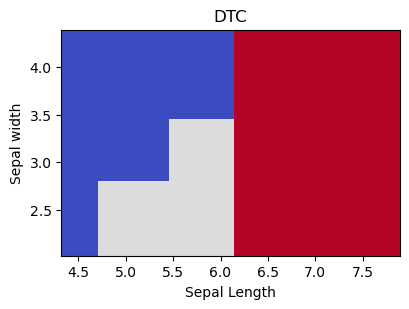

In [23]:
from sklearn import tree
#%% Tree Classifier model for the Iris data

tree_classifiers = {'DTC' : tree.DecisionTreeClassifier(max_depth=3)}

# the punch line is to predict for a large grid of data points
# http://scikit-learn.org/stable/auto_examples/neighbors
# /plot_classification.html
def plot_boundary(ax, data, tgt, model, dims, grid_step = .01):
    # grab a 2D view of the data and get limits
    twoD = data[:, list(dims)]
    min_x1, min_x2 = np.min(twoD, axis=0) + 2 * grid_step
    max_x1, max_x2 = np.max(twoD, axis=0) - grid_step
    
    # make a grid of points and predict at them
    xs, ys = np.mgrid[min_x1:max_x1:grid_step,
    min_x2:max_x2:grid_step]
    grid_points = np.c_[xs.ravel(), ys.ravel()]
    
    # warning: non-cv fit
    preds = model.fit(twoD, tgt).predict(grid_points).reshape(xs.shape)
    
    # plot the predictions at the grid points
    ax.pcolormesh(xs,ys,preds,cmap=plt.cm.coolwarm) # 0 Blue; 1 Grey; 2 Red
    ax.set_xlim(min_x1, max_x1)#-grid_step)
    ax.set_ylim(min_x2, max_x2)#-grid_step)

fig, ax = plt.subplots(1,1,figsize=(4,3))

for name, mod in tree_classifiers.items():
    # plot_boundary only uses specified columns
    # [0,1] [sepal len/width] to predict and graph
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
    plt.tight_layout()
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal width')

# initialise Decision Tree Model
dtc = tree.DecisionTreeClassifier()
# Fit decision tree model on Iris data (use 3-fold Cross-Validation)
# and compute prediction accuracy
print("3-fold CV Decision Tree accuracy on Iris data ")
model_selection.cross_val_score(dtc,
                                iris.data,
                                iris.target,
                                cv=3,
                                scoring='accuracy')

### Visualising the Decision Tree

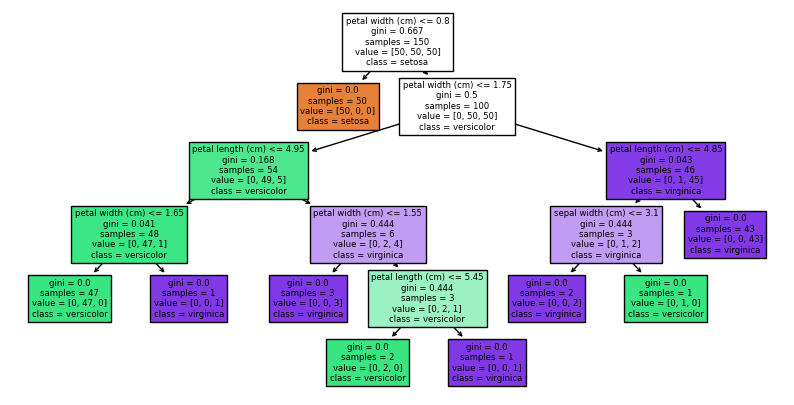

In [24]:
dtc.fit(iris.data,iris.target)
plt.figure(figsize=(10,5))
tree.plot_tree(dtc, filled=True, feature_names=iris.feature_names, class_names=['setosa','versicolor','virginica'])
plt.show()

## Ensemble Methods

- **Techniques that combine multiple models to create a more accurate predictive model.**

- **Several types of ensemble models:**
  - **Bagging:** Multiple models are trained independently on a random subset of training data. Predictions are then averaged (regression) or voted (classification) to produce a final prediction.
  - **Boosting:** Build models sequentially with each model focusing on correcting the errors in previous ones.
  - **Stacking:** Involves training multiple models and then using another model to combine outputs in the best possible way.

### Examples of Ensemble Methods

- **Random Forest:** A versatile ensemble method that builds multiple decision trees using random subsets of data and features, and averages their predictions to improve accuracy and control overfitting.

- **LightGBM:** A highly efficient gradient boosting framework that uses histogram-based algorithms and leaf-wise growth to speed up training and improve performance on large datasets.

- **XGBoost:** An optimized gradient boosting library that implements a regularized version of gradient boosting, focusing on speed and performance, particularly in terms of handling sparse data and large-scale problems.

- **ExtraTrees:** An ensemble method similar to Random Forest, but it builds trees with more randomness by selecting cut-points for splits randomly, which often leads to more diverse trees and sometimes better generalization.

### Case Study - Predicting Handwritten Digits

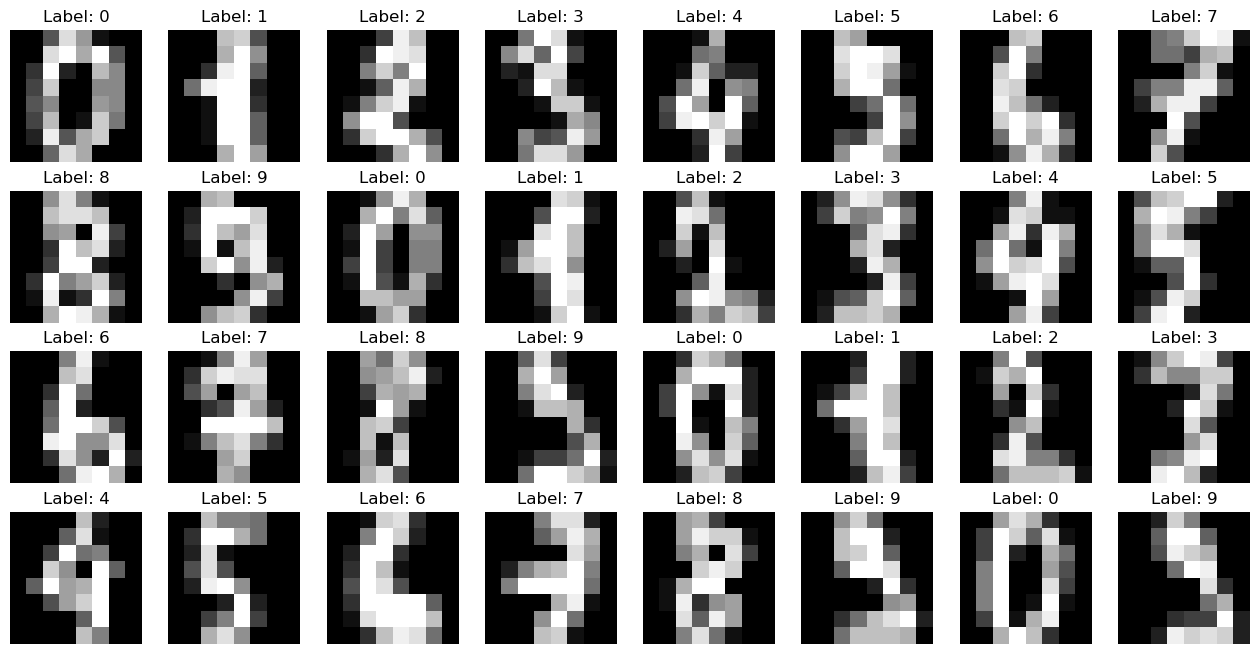

In [25]:
from sklearn import ensemble

#%% Comparing Ensemble Methods
# Data:
digits = datasets.load_digits()
digits_ftrs, digits_tgt = digits.data, digits.target

# Visualising the Digits
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

def fit_predict_score(model, ds):
    return model_selection.cross_val_score(model, *ds, cv=10).mean()

stump = tree.DecisionTreeClassifier(max_depth=1)
dtree = tree.DecisionTreeClassifier(max_depth=3)
forest1 = ensemble.RandomForestClassifier(max_features=1, max_depth=1,n_jobs=-1)
forest2 = ensemble.RandomForestClassifier(max_features=2, max_depth=10,n_jobs=-1)

tree_classifiers = {'stump' : stump, 'dtree' : dtree, 'forest1': forest1, 'forest2': forest2}
max_est = 100

data = (digits_ftrs, digits_tgt)
stump_score = fit_predict_score(stump, data)
tree_score = fit_predict_score(dtree, data)

def interpolate_list(input_list, num_points):
    # Create an empty list to store the result
    interpolated_list = []
    
    # Loop through the list, interpolating between each pair of points
    for i in range(len(input_list) - 1):
        start = input_list[i]
        end = input_list[i + 1]
        # Interpolate between start and end
        interpolated_values = np.linspace(start, end, num_points, endpoint=False)
        # Add these interpolated values to the list, except the last one (to avoid duplication)
        interpolated_list.extend(interpolated_values)
    
    # Append the last element of the original list
    interpolated_list.append(input_list[-1])
    
    return interpolated_list

# This can be slow. We predict every other and then interpolate to speed it up.
forest1_scores = [fit_predict_score(forest1.set_params(n_estimators=n),
                                    data) for n in range(1,max_est+1,2)]
forest1_scores = interpolate_list(forest1_scores, 2)

# This can be slow. We predict every other and then interpolate to speed it up.
forest2_scores = [fit_predict_score(forest2.set_params(n_estimators=n),
                                    data) for n in range(1,max_est+1,2)]
forest2_scores = interpolate_list(forest2_scores, 2)


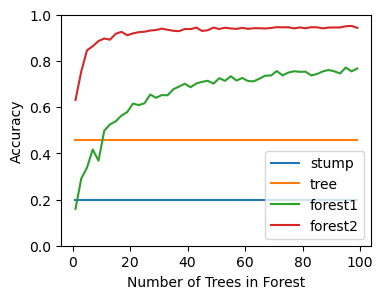

In [26]:

#We can view those results graphically:
fig, ax = plt.subplots(figsize=(4,3))
xs = list(range(1,max_est))
ax.plot(xs, np.repeat(stump_score, max_est-1), label='stump')
ax.plot(xs, np.repeat(tree_score, max_est-1), label='tree')
ax.plot(xs, forest1_scores, label='forest1')
ax.plot(xs, forest2_scores, label='forest2')
ax.set_xlabel('Number of Trees in Forest')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right');
ax.set_yticks([x * 0.2 for x in range(0, 6)])